<IPython.core.display.Javascript object>


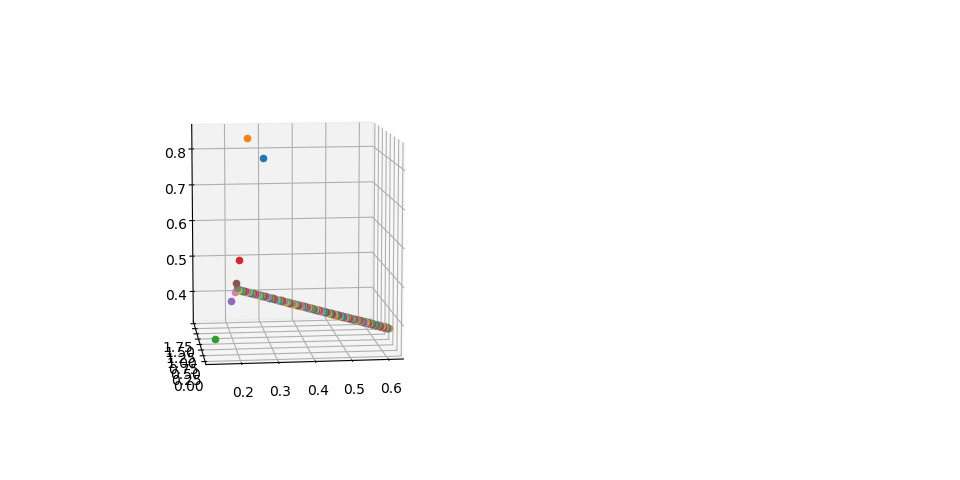

<IPython.core.display.Javascript object>


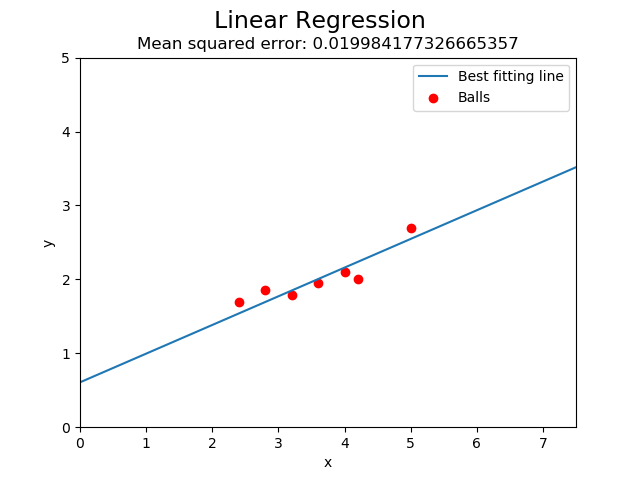

final formula: y= 0.38795654847333905 *x+ 0.6070781461520411


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import random
import time
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
%matplotlib notebook

dataset = "./datasets/idk.csv"
def mse(m,b,cso):
    'Means square error'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*(i[1]-((m*i[0])+b)))
    return res/len(cso)
def jm(m,b,cso,lr):
    'Gradient descent for slope'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*i[0]*(-2))
    return (res/len(cso))*lr
def jb(m,b,cso,lr):
    'Gradient descent for bias'
    res = 0
    for i in cso:
        res = res +((i[1]-((m*i[0])+b))*(-2))
    return (res/len(cso))*lr
results = []
with open(dataset) as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)
df = pd.read_csv(dataset, delimiter=',', names=['x', 'y'])
#slope = random.uniform(0, 1)
#b = random.uniform(0, 1)
slope = random.uniform(0, 1)
b = random.uniform(0, 1)
lr = 0.05
maxerr = 0.02
iteration = 0
fail = 0
failb = 0
f = lambda x: slope*x + b

#x2 = [1,2,3,4,7,1]
#y2 = [3,4,8,6,7,7]
#z2 = [1,2,3,4,7,7]

fig2 = plt.figure(figsize=plt.figaspect(0.5))
ax2 = fig2.add_subplot(1, 2, 1, projection='3d')

x2 = [b]
y2 = [fail]
z2 = [slope]
ax2.scatter(x2, y2, z2)


x = np.linspace(0,10,1000)
fig,ax = plt.subplots(1,1)
ax.set_xlim(0,7.5)
ax.set_ylim(0,5)
ax.scatter(df['x'], df['y'],c=['r'],label='Balls')
ax.plot(x, f(x),label='Best fitting line')
plt.xlabel('x')
plt.ylabel('y')
fig.suptitle('Linear Regression', fontsize=17)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

while True:
    try:
        fail = mse(slope,b,results)
        #print(fail)
        plt.title('Mean squared error: '+str(fail))
        #slope+=1
        iteration+=1
        #b+=1
        #ax.plot(x, f(x))
        #ax.lines.set_xdata(x)
        #ax.lines.set_ydata(f(x))
        for line in ax.lines:
            line.set_xdata(x)
            line.set_ydata(f(x))
        fig.canvas.draw()
        x2 = [b]
        y2 = [fail]
        z2 = [slope]
        ax2.scatter(x2, y2, z2)
        f = lambda x: slope*x + b
        if (fail<maxerr) or (fail==failb):
            break
        else:
            slopet = slope
            bt = b
            slope = slopet - jm(slopet,bt,results,lr)
            b = bt - jb(slopet,bt,results,lr)
            failb=fail
    except KeyboardInterrupt:
        break
print('final formula: y=',slope,'*x+',b)


In [53]:
f = lambda x: slope*x + b

df = pd.read_csv(dataset, delimiter=',', names=['x', 'y'])
plt.scatter(df['x'], df['y'], label='csv')
#x=np.array([2,5])
x = np.linspace(0, 10, 1000)
plt.plot(x, f(x))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Depression')
plt.legend()
plt.show()
print('number of iteration: ',iteration)
print('final formula: y=',slope,'*x+',b)

number of iteration:  6
final formula: y= 0.3186921236205855 *x+ 0.844528769549636
